<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/Algorithms_Recursion_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##"To understand recursion, you must first understand recursion"

So far in this bootcamp, you've seen many different algorithms whether that be for sorting, finding a certain value, mapping values, etc. For today's lecture we will dive a little further into one of these types of Algorithms, Recursion.

A recursive function is a function that breaks down a big problem into several smaller problems and calls itself in order to solve these smaller problems. Two examples that you have seen are the Staircase coding problem, Fibonacci Sequence and the  Lexicographically Largest Valid Sequence Questions.

In order to create a recursive algorithm to solve a problem, we must think of how to break down the problem into smaller, more simple problems. We need to break our problem down small enough such that we know the answer to this simpler problem and establish a **base case** from which our algorithm to work from.

Let's use the Fibonacci Sequence:

In [1]:
def fib(n):
  if n==1:
    return 0
  elif n==2:
    return 1
  else:
    return fib(n-1) + fib(n-2)

In [2]:
fib(5)

3

Using recursion to solve problems can yield more efficient methods in terms of Time Complexity. As a general rule of thumb, the big O of recursive algorithms is $O(b^d)$ where b is the branching factor and d is the depth of the algorithm. To understand the Time Complexity of the above solution, let's use a Tree Diagram:

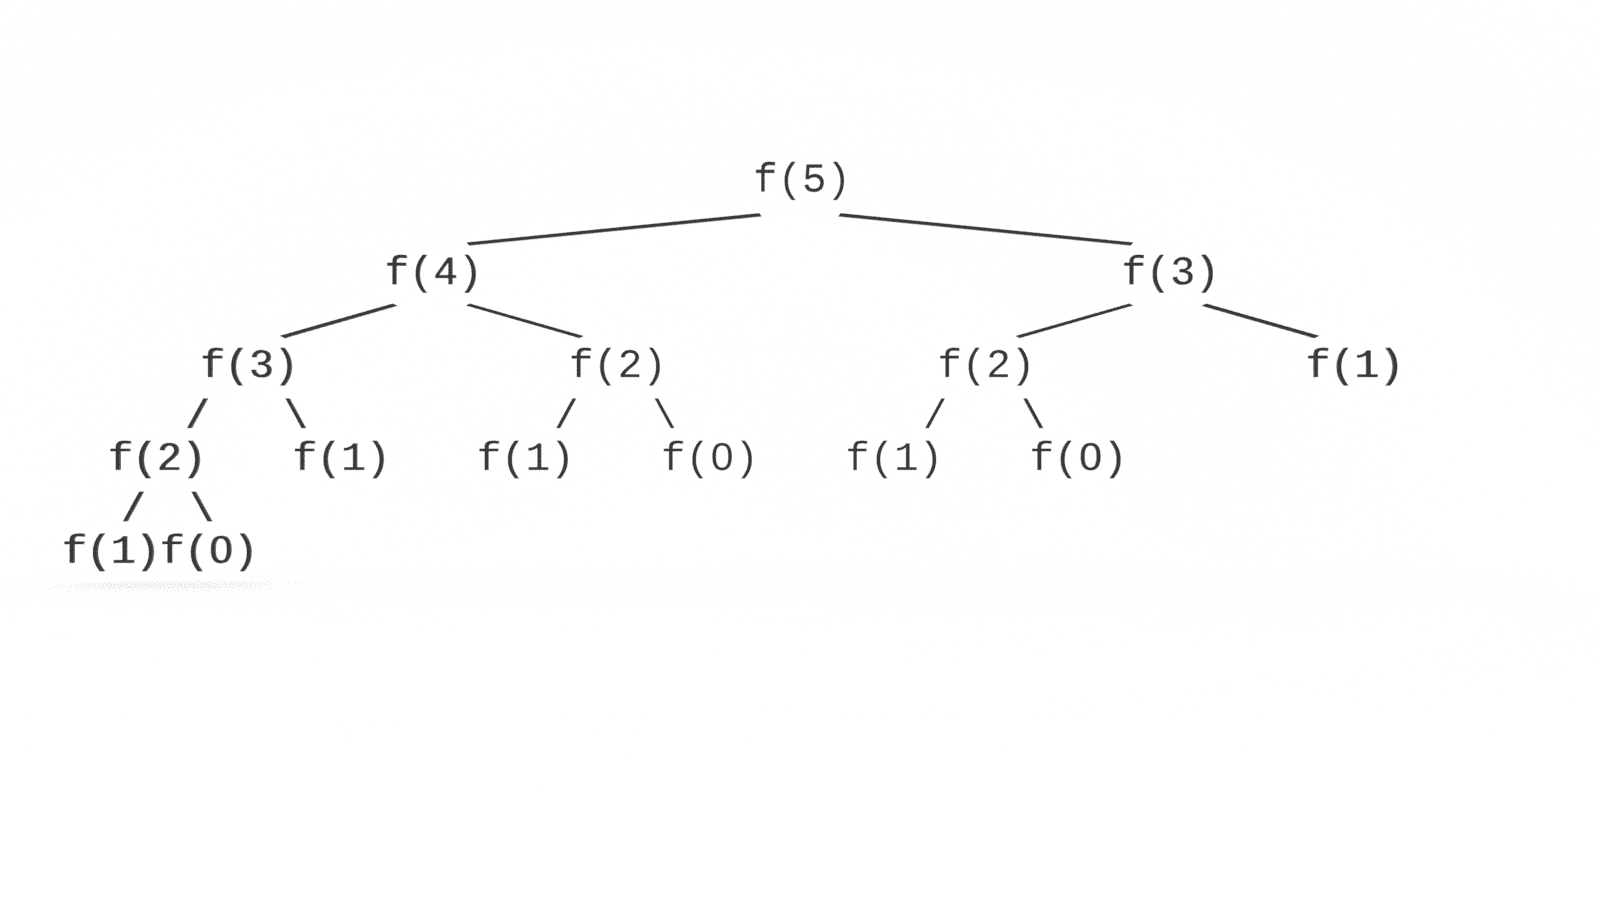

The branching factor is 2. The depth is n where n is the number on which the function is called. Thus the big O of this function is:
$$O(b^d) = O(2^n)$$

In [7]:
#Exercise: Write a recursive algorithm to find the factorial of a given number.

def factorial(n):
  if n==0:
    return 1
  elif n==1:
    return 1
  else:
    return n*factorial(n-1)
  

In [8]:
factorial(3)

6

##Determine the number of digits in a Positive Integer

We can determine the number of digits in a positive integer by counting how many times we can divide it by 10 (without remainder) untill we get a result that is less than 10 at which we add one to the count we have.

Write a function that can do this by using recursion:

In [13]:
def count(n, digits = 0):
  if n>0 and n<10:
    return digits + 1
  else:
    digits = digits +1
    return count(n//10, digits =digits)



In [14]:
count(12)

2

#Recursive Maximum

Write a recursive Python function that has a
parameter representing a list of integers and returns the maximum
stored in the list. Thinking recursively, the maximum is either the
first value in the list or the maximum of the rest of the list,
whichever is larger. If the list only has 1 integer, then its maximum
is this single value, naturally.


In [23]:
def findmax(x):
  if len(x)==1:
    return x[0]
  else:
    return max(x[0], findmax(x[1:]))


In [24]:
a = [1,2,3,4,5]
findmax(a)

5

#Construct the Lexicographically Largest Valid Sequence

 Given an integer n, find a sequence that satisfies all of the following:

The integer 1 occurs once in the sequence.
Each integer between 2 and n occurs twice in the sequence.
For every integer i between 2 and n, the distance between the two occurrences of i is exactly i.
The distance between two numbers on the sequence, a[i] and a[j], is the absolute difference of their indices, |j - i|.

Return the lexicographically largest sequence. It is guaranteed that under the given constraints, there is always a solution.

A sequence a is lexicographically larger than a sequence b (of the same length) if in the first position where a and b differ, sequence a has a number greater than the corresponding number in b. For example, [0,1,9,0] is lexicographically larger than [0,1,5,6] because the first position they differ is at the third number, and 9 is greater than 5.




```
Input: n = 3
Output: [3,1,2,3,2]
Explanation: [2,3,2,1,3] is also a valid sequence, but [3,1,2,3,2] is the lexicographically largest valid sequence.
```




In [47]:
class Solution:
  def constructDistancedSequence(self, n: int) -> List[int]:
      if n == 1: return [1] # edge case 
      ans = [0]*(2*n - 1)
      ans[0] = ans[n] = n
      ans[1] = n-2
      if n-2 > 1: ans[n-1] = n-2
      def fn(k): 
          """Find the lexicographically largest valid sequence via backtracking."""
          if k == 2*n-1: return True # boundary condition 
          if ans[k] and fn(k+1): return True 
          for x in reversed(range(1, n)): 
              if x != n-2:
                  if x not in ans: 
                      xx = x if x > 1 else 0
                      if k+xx < 2*n-1 and ans[k] == ans[k+xx] == 0: 
                          ans[k] = ans[k+xx] = x
                          if fn(k+1): return True 
                          ans[k] = ans[k+xx] = 0
      fn(0)
      return ans

NameError: ignored